In [20]:
from ema_workbench import load_results
from SALib.analyze import sobol
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from vadere_ema_formulations import get_vadere_formulation


In [2]:
model = get_vadere_formulation(
    id=1,
    replications=1,
    model_file='baseCaseData.scenario'
)

In [6]:
experiments, outcomes = load_results('../data/output/EMA/sobolTest01.tar.gz')

In [18]:
def get_sobol_results(outcome):
    problem = get_SALib_problem(model.uncertainties)
    Si = sobol.analyze(problem, outcomes[outcome],
                   calc_second_order=True, print_to_console=False)
    print(Si)
    
    scores_filtered = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
    Si_df = pd.DataFrame(scores_filtered, index=problem['names'])

    sns.set_style('white')
    fig, ax = plt.subplots(1)

    indices = Si_df[['S1','ST']]
    err = Si_df[['S1_conf','ST_conf']]

    indices.plot.bar(yerr=err.values.T,ax=ax)
    fig.set_size_inches(8,6)
    fig.subplots_adjust(bottom=0.3)
    plt.show()

In [21]:
def get_sobol_convergence(outcome, n_exp):
    problem = get_SALib_problem(model.uncertainties)
    s_data = pd.DataFrame(index=problem['names'],
                        columns=np.arange(20,n_exp,50)*(2*problem['num_vars']+2))
    for j in s_data.columns:
        scores = sobol.analyze(problem, outcomes[outcome][0:j], calc_second_order=True, print_to_console=False)
        s_data.loc[:,j] = scores['ST']
    fig, ax = plt.subplots(1)

    s_data.T.plot(ax=ax)
    ax.set_xlabel('Samples')
    ax.set_ylabel('Total index (ST)')
    plt.show()

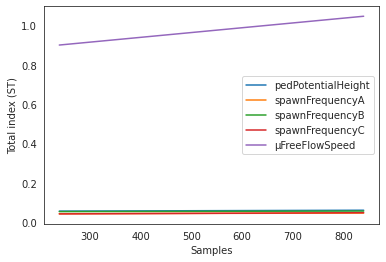

In [22]:
get_sobol_convergence('meanSpeed', 100)

{'S1': array([0.05481888, 0.03084448, 0.01054365, 0.03702871, 0.98994942]), 'S1_conf': array([0.06302028, 0.06024699, 0.0547572 , 0.06321164, 0.21739505]), 'ST': array([0.06345255, 0.04591264, 0.04888697, 0.04666358, 1.08680829]), 'ST_conf': array([0.01952178, 0.01697458, 0.01427477, 0.01524714, 0.22429228]), 'S2': array([[        nan, -0.00185867,  0.01004771, -0.00754127,  0.02295516],
       [        nan,         nan, -0.04982363, -0.05517649,  0.0108299 ],
       [        nan,         nan,         nan, -0.05011034,  0.03500886],
       [        nan,         nan,         nan,         nan,  0.03274607],
       [        nan,         nan,         nan,         nan,         nan]]), 'S2_conf': array([[       nan, 0.10417938, 0.09944831, 0.09777949, 0.11324187],
       [       nan,        nan, 0.09975164, 0.09691868, 0.09501965],
       [       nan,        nan,        nan, 0.07163342, 0.10513036],
       [       nan,        nan,        nan,        nan, 0.10603084],
       [       nan,     

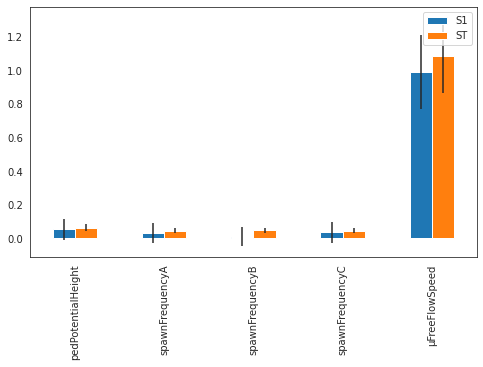

In [19]:
get_sobol_results('meanSpeed')